# Battle of Neightborhoods. Moving Toronto to New Jersey

## 1. Introduction

### 1.1 Background

People who is looking for a similar city to live in New Jersey, trying to get all amenities they have in Toronto. When moving out somewhere else due to work, family or any other, is very important to reduce stress as much as possible, one of the most common stressful things is to arrive somewhere that you don’t even know what kind of venues you have available to visit and feel that everything is as close as you have them in your own home, with this project we are going to make it easy for those who have to be involved in these processes, so they can feel like their home faster that people that don’t consider this as an issue.


### 1.2 Problem

When people moving out somewhere else for different reasons, sometimes it’s difficult for them and their families since they feel themselves as strangers where they have to start call home. Leaving all behind they lose time when feeling and adapting to new things.  

- We are going to prepare some tools and necessary libraries.

In [3]:
!pip install folium
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')



     |████████████████████████████████| 102kB 3.6MB/s ta 0:00:011
Libraries imported.


## 2.Data Acquire

We are going to get the necessary datasets in order to see boroughs, neighborhoods and the locations of the cities that we are going to explore. Foursqaure API will be used to analyze places nearby these neighborhoods and see the proximity of important places from the corresponding neighborhoods.

In [8]:
# importing data sets for both cites
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
from bs4 import BeautifulSoup as bsoup
from urllib.request import urlopen as uReq
import requests
import lxml
import pandas as pd
from pandas import DataFrame
import numpy as np

In [9]:
my_url='https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

In [10]:
r=requests.get(my_url)

In [11]:
website=bsoup(r.text,"html.parser")
website

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of postal codes of Canada: M - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"8e142803-38f8-4855-8b73-8b0e1e07020b","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":969510799,"wgRevisionId":969510799,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata","Communications in Ontario","

In [12]:
table=website.table
table

<table class="wikitable sortable">
<tbody><tr>
<th>Postal Code
</th>
<th>Borough
</th>
<th>Neighbourhood
</th></tr>
<tr>
<td>M1A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M2A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3A
</td>
<td>North York
</td>
<td>Parkwoods
</td></tr>
<tr>
<td>M4A
</td>
<td>North York
</td>
<td>Victoria Village
</td></tr>
<tr>
<td>M5A
</td>
<td>Downtown Toronto
</td>
<td>Regent Park, Harbourfront
</td></tr>
<tr>
<td>M6A
</td>
<td>North York
</td>
<td>Lawrence Manor, Lawrence Heights
</td></tr>
<tr>
<td>M7A
</td>
<td>Downtown Toronto
</td>
<td>Queen's Park, Ontario Provincial Government
</td></tr>
<tr>
<td>M8A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M9A
</td>
<td>Etobicoke
</td>
<td>Islington Avenue, Humber Valley Village
</td></tr>
<tr>
<td>M1B
</td>
<td>Scarborough
</td>
<td>Malvern, Rouge
</td></tr>
<tr>
<td>M2B
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3B
</td>
<td

In [13]:
rows=table.find_all('tr')
nrows=len(rows)
nrows

181

In [14]:
rows[0:5]

[<tr>
 <th>Postal Code
 </th>
 <th>Borough
 </th>
 <th>Neighbourhood
 </th></tr>, <tr>
 <td>M1A
 </td>
 <td>Not assigned
 </td>
 <td>Not assigned
 </td></tr>, <tr>
 <td>M2A
 </td>
 <td>Not assigned
 </td>
 <td>Not assigned
 </td></tr>, <tr>
 <td>M3A
 </td>
 <td>North York
 </td>
 <td>Parkwoods
 </td></tr>, <tr>
 <td>M4A
 </td>
 <td>North York
 </td>
 <td>Victoria Village
 </td></tr>]

In [15]:
header=rows[0].text.split()
header

['Postal', 'Code', 'Borough', 'Neighbourhood']

In [16]:
rows[69].text

'\nM6K\n\nWest Toronto\n\nBrockton, Parkdale Village, Exhibition Place\n'

In [17]:
rows[69].text.split('\n')

['',
 'M6K',
 '',
 'West Toronto',
 '',
 'Brockton, Parkdale Village, Exhibition Place',
 '']

In [18]:
Postal_Code=rows[69].text.split('\n')[1]
Postal_Code

'M6K'

In [19]:
Borough=rows[69].text.split('\n')[3]
Borough

'West Toronto'

In [20]:
Neighborhood=rows[69].text.split('\n')[5]
Neighborhood

'Brockton, Parkdale Village, Exhibition Place'

In [21]:
records =[]
n=1
while n < nrows :
    Postcode=rows[n].text.split('\n')[1]
    Borough=rows[n].text.split('\n')[3]
    Neighborhood=rows[n].text.split('\n')[5]
    records.append((Postcode, Borough,Neighborhood))
    n=n+1

df=pd.DataFrame(records, columns=['Postal Code', 'Borough', 'Neighbourhood'])
df.head(10)

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


In [22]:
df[df['Borough']=='Not assigned'].count()

Postal Code      77
Borough          77
Neighbourhood    77
dtype: int64

In [23]:
df1=df[~df.Borough.str.contains("Not assigned")]
df1=df1.reset_index(drop=True)

In [24]:
df1.loc[df1['Neighbourhood'] == 'Not assigned', 'Neighbourhood'] = df1['Borough']


In [25]:
df1.head(10)

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [26]:
df1.shape

(103, 3)

In [27]:
url='http://cocl.us/Geospatial_data'
df_pcodes=pd.read_csv(url)
df_pcodes.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [28]:
df1=df1.sort_values('Postal Code')
df1.head()


,Postal Code,Borough,Neighbourhood
6,M1B,Scarborough,"Malvern, Rouge"
12,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
18,M1E,Scarborough,"Guildwood, Morningside, West Hill"
22,M1G,Scarborough,Woburn
26,M1H,Scarborough,Cedarbrae


In [32]:
neighborhoods_toronto=pd.merge(df1,df_pcodes, how='right', on = 'Postal Code')
neighborhoods_toronto.head()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [33]:
neighborhoods_toronto.shape

(103, 5)

In [40]:
my_url2= 'https://www.zip-codes.com/city/nj-paterson.asp'

In [41]:
r2=requests.get(my_url2)


<!DOCTYPE HTML>

<html><head>
<title>All Zip Codes in Paterson NJ</title>
<meta content="City of Paterson, NJ - PASSAIC County New Jersey ZIP Codes. Detailed information on every zip code in Paterson" name="description"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="en-us" http-equiv="content-language"/>
<meta content="index,follow" name="robots"/>
<link href="https://www.zip-codes.com/city/nj-paterson.asp" rel="canonical"/>
<link href="https://www.zip-codes.com/m/city/nj-paterson.asp" media="only screen and (max-width: 640px)" rel="alternate"/>
<script async="" src="https://www.zip-codes.com/m/theme/ga/local-analytics.js"></script><script> window.dataLayer = window.dataLayer || [];function gtag(){dataLayer.push(arguments);}gtag('js', new Date());gtag('config', 'UA-23873959-1');</script><!--%--><script data-cfasync="false" type="text/javascript">(function(w, d) { var s = d.createElement('script'); s.src = '//cdn.adpushup.com/40254/adpushup.js'; s
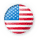

In [42]:
website2=bsoup(r2.text,"html.parser")
website2

In [43]:
table2=website2.table
table2

<table align="center" bgcolor="#FFFFFF" border="0" cellpadding="0" cellspacing="0" width="950">
<tr>
<td valign="top" width="195"><div class="side" id="side">
<div class="box"><div class="hd">Our Products</div><div class="cn">• <a href="/zip-code-database.asp" title="US ZIP Code Database">US ZIP Code Database</a><br/>• <a href="/zip-plus-4-database.asp" title="US ZIP Code Database">US ZIP+4 Database</a><br/>• <a href="/2010-census-database.asp" title="2010 Census Multi Level Database">2010 Census Database</a><br/>• <a href="/canadian-postal-code-database.asp" title="Canadian Database">Canadian Postal Codes</a><br/>• <a href="/map-boundary-data.asp" title="ZIP Code Boundary Data">ZIP Code Boundary Data</a><br/>• <a href="/zip-code-api.asp" title="ZIP Code API">ZIP Code API</a><span class="new"> NEW!</span><br/>• <a href="/area-code-database.asp" title="Area Code Database">Area Code Database</a><br/>• <a href="/zip-code-historical-database.asp" title="Historical Zip Codes">Historical Zip

In [44]:
rows2=table2.find_all('tr')
nrows2=len(rows2)
nrows2

53

In [45]:
rows2[0:5]

[<tr>
 <td valign="top" width="195"><div class="side" id="side">
 <div class="box"><div class="hd">Our Products</div><div class="cn">• <a href="/zip-code-database.asp" title="US ZIP Code Database">US ZIP Code Database</a><br/>• <a href="/zip-plus-4-database.asp" title="US ZIP Code Database">US ZIP+4 Database</a><br/>• <a href="/2010-census-database.asp" title="2010 Census Multi Level Database">2010 Census Database</a><br/>• <a href="/canadian-postal-code-database.asp" title="Canadian Database">Canadian Postal Codes</a><br/>• <a href="/map-boundary-data.asp" title="ZIP Code Boundary Data">ZIP Code Boundary Data</a><br/>• <a href="/zip-code-api.asp" title="ZIP Code API">ZIP Code API</a><span class="new"> NEW!</span><br/>• <a href="/area-code-database.asp" title="Area Code Database">Area Code Database</a><br/>• <a href="/zip-code-historical-database.asp" title="Historical Zip Codes">Historical Zip Codes</a><br/>• <a href="/zip-code-radius-app.asp" title="FREE Radius Application">FREE Radi

In [46]:
header2=rows2[0].text.split()
header2

['Our',
 'Products•',
 'US',
 'ZIP',
 'Code',
 'Database•',
 'US',
 'ZIP+4',
 'Database•',
 '2010',
 'Census',
 'Database•',
 'Canadian',
 'Postal',
 'Codes•',
 'ZIP',
 'Code',
 'Boundary',
 'Data•',
 'ZIP',
 'Code',
 'API',
 'NEW!•',
 'Area',
 'Code',
 'Database•',
 'Historical',
 'Zip',
 'Codes•',
 'FREE',
 'Radius',
 'Application•',
 'FREE',
 'Store',
 'Locator•',
 'FREE',
 'Mobile',
 'App•',
 'NPA',
 'NXX',
 'DatabaseFind',
 'ZIP+4',
 'of',
 'AddressFind',
 'the',
 'ZIP',
 'Code,',
 'County,',
 'and',
 '+4',
 'of',
 'any',
 'U.S.',
 'AddressFREE',
 'ZIP',
 'Code',
 'FinderFind',
 'info',
 'on',
 'any',
 'U.S.',
 'ZIP',
 'CodeOther',
 'FREE',
 'LookupsLookup',
 'ZIP',
 'Code',
 'of',
 'any',
 'City,',
 'State,',
 'County',
 'or',
 'Area',
 'CodeFREE',
 'Radius',
 'SearchFind',
 'all',
 'ZIP',
 'CodesFrom',
 '0',
 'MilesFrom',
 '5',
 'MilesFrom',
 '10',
 'MilesFrom',
 'From',
 '15',
 'MilesFrom',
 '20',
 'MilesFrom',
 '25',
 'MilesTo',
 '5',
 'MilesTo',
 '10',
 'MilesTo',
 '15',
 'Mi